# Raspberry pi
---


### Analog signals
---
An analog signal is a continuous signal in which one `time-varying quantity` (such as voltage, pressure, etc.) represents another time-based `variable`.   



### Digital signals
---
Digital signals, by contrast, express `variation` in the system’s variable in response to a set of `discrete values`.     



### PWM
---

Digital signals have two positions: on or off, interpreted in shorthand as 1 or 0. Analog signals, on the other hand, can be on, off, half-way, two-thirds the way to on, and an infinite number of positions between 0 and 1 either approaching 1 or descending down to zero. 

The two are handled very differently in electronics, but very often must work together (that’s when we call it “mixed signal electronics.”) Sometimes we have to take an analog (real world) input signal (e.g., temperature) into a microcontroller (which only understands digital). Often engineers will translate that analog input into digital input for the microcontroller (MCU) by using an analog-to-digital converter. But what about outputs?



**`PWM` is a way to control analog devices with a `digital output`.** Another way to put it is that you can output a `modulating signal` from a digital device such as an MCU to `drive` an analog device. It’s one of the primary means by which MCUs `drive` analog devices like `variable-speed motors`, `dimmable lights`, and `speakers`. PWM is not true `analog output`, however. PWM “fakes” an `analog-like result` by applying power in pulses, or short bursts of regulated voltage.


An example would be to `apply` full voltage to a motor or lamp for `fractions of a second` or `pulse` the voltage to the motor `at intervals` that made the motor or lamp do what you wanted it to do. `In reality`, the voltage is being applied and then removed many times `in an interval`, but what you experience is an `analog-like response`. 


If you have ever jogged a `box fan` by applying power `intermittently`, you will experience a PWM response. The fan and its motor do not stop `instantly`(瞬间) due to `inertia`(惯性), and so by the time you re-apply power it has only slowed a bit.

Therefore, you do not experience an `abrupt`(sudden) stop in power if a motor is driven by PWM. The length of time that a pulse is in a given state (high/low) is the “width” of a `pulse wave`. 

### Duty Cycle
---

A device that is `driven` by PWM ends up behaving like `the average of the pulses`. The average voltage level can be a steady voltage or a moving target (dynamic/changing over time). To simplify the example, let’s assume that your PWM-driven fan has a high-level voltage of 24 volts. If the pulse is driven high 50% of the time, we call this a 50% `duty cycle`. The term `duty cycle` is used elsewhere in electronics, but in every case duty cycle is a comparison of “on” versus “off.”

Going back to our fan motor example, if we know that the `high voltage` is 24, the low is 0v, and the `duty cycle` is 50%, then we can determine the `average voltage` by `multiplying`the duty cycle `by` the pulse’s high level.

If you want the motor to go faster, you can `drive` the `PWM output` to a `higher duty cycle`. The higher the `frequency` of high `pulses`, the higher the `average voltage` and the faster the fan motor will spin.

#### example    
IF you were making `your own PWM output` by `plugging`(插电) the fan in and out of a `socket`(插孔) at equal intervals of 1 second in the socket, 1 second out, then you are acting like a `digital output` that’s `driving` the fan at a steady average of 12V.

The analogy comes in when you increase the `frequency` of plugging in and out of the socket so that you only have it in the socket ½ a second and out of the socket an equal ½ second. At this point, your `duty cycle is still 50%`, but you have `increased` the number of `cycles per second` to two. In electronics, we would identify `frequency` as `cycles per second`, or `Hertz (Hz.)` You have increased the speed of the fan. That ½ second is the `width` of the `pulse` you are making.

You might have gathered by now that `PWM`, `duty cycle`, and `frequency` are interrelated. We use duty cycle and frequency to `describe` the PWM, and we often talk about frequency in reference to `speed`. 

For example, a `variable frequency drive` motor produces a response like analog device in the real world. The separate pulses that the VFD motor gets are not discernable to us; as far as we can see, the pulses are so fast (usually somewhere in the milliseconds) that by real world standards it just seems like a motor ramping up.

> Duty Cycle x High Voltage Level = Average Voltage



Now put the word “instantaneous” in there and you get the idea that things are dynamically changing…which looks more analog (see Figure 2):

> Instantaneous Duty Cycle x High Voltage Level = Instantaneous Average Voltage

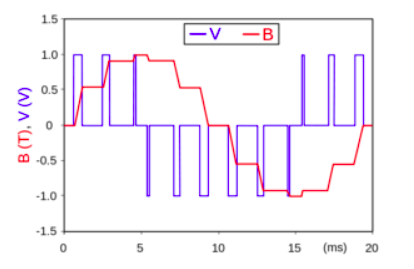
Figure 2: The blue lines are `PWM output` from an `MCU`, and the red line is the `average voltage`. In this case, the pulse width (and corresponding duty cycle) change so that the average voltage looks more like an `analog output` that is not in a steady state such as shown in Figure 1. 

The duty cycle can change to `affect` the average voltage that the motor experiences. The frequency of the cycles can increase. The pulse can even be increased in length. These can all happen together, too, but in general, it’s easier to think of as either duty cycle increasing or frequency increases to increase the speed of the motor. (Pulse width is directly related to duty cycle, so if you decide to increase the `width of a pulse`, you are just altering the duty cycle.)

**merely flicking the output on and off at varying speeds and for varying lengths of time is how you get pulse width modulation to fake an analog output.**  

**MCUs are digital**. An example of something that can create a true analog output would be a `transducer` (something that directly translates physical phenomenon to an analog signal). But transducers are another analog discussion.


### AC and DC motors
---

While both A.C. and D.C. `motors`(电机) serve the same function(功能) of converting(转换) `electrical energy` into `mechanical energy`, they are powered, constructed and controlled differently. 虽然交流电机和直流电机都具有将电能转换为机械能的相同功能，但它们的供电、构造和控制方式不同。

The most basic difference is the `power source`. A.C. motors are powered from `alternating current` (A.C.) while D.C. motors are powered from `direct current` (D.C.), such as batteries, `D.C. power supplies` or an AC-to-DC `power converter`. 

交流电：我们生活中最常用的插线板就是通交流电的，例如手机插头，没有正负之分，怎么插进去都行。
直流电：有正负极之分，也就是必须按照相应极连接，例如电池等。



#### PWM的频率和占空比 
----

频率不控制什么，但是频率的高低会产生其他一些副作用。比如在电机控制中，频率太低会导致运动不稳定，如果频率刚好在人耳听觉范围，有时还会听到呼啸声。对于需要进行直流滤波的场合，频率越高，滤波的效果就越好。但是也不是说频率高一定好，太高的频率电机可能反应不过来。而且，如果PWM是由单片机产生的，那么他的频率和位数是成反比的（一些低端的单片机频率基本是确定的，位数也是确定的，不存在这个问题），比如说，单片机频率10M，如果PWM频率是5M，那么一个PWM周期内就只有两个机器周期，那么占空比的值就只有 0、50%、100%这三种。如果PWM频率是5k，那么一个PWM周期有2000个机器周期，占空比最小就可以去到1 / 2000 = 0.05%。所以实际运用中，要根据硬件因素设定频率，一旦设定了，也就不需要更改了，因为硬件是不会改变的。


占空比才是真正PWM应用的，其实就是开关的打开和关断的时间比值，这个比值在宏观上可以欺骗人眼，于是形成和电位器一样的作用。比如对一个电灯来说，你在1秒内，打开开关0.5秒，再关闭0.5秒，如此反复，那么电灯就会闪烁，但是如果是1毫秒内，0.5毫秒打开，0.5毫秒关闭，由于视觉暂留作用，也可能由于灯光的亮灭速度赶不上开关速度（还没全亮就又没电了），于是人眼不感觉电灯在闪烁，而是感觉灯的亮度少了一半。同理，如果是0.1毫秒开，0.9毫秒灭，感觉灯的亮度就只有1/10了。对于电机的原理也差不多，开关开时电机加速，关闭时电机减速，根据是加速时间多还是减速时间多，我们感觉总体的转速就是快了或慢了。当然，具体分析时还需考虑电机的电感作用，电感有滤波效果，但是用这个方式去理解也是成立的。


回到前面的频率问题，就如刚才说的，1秒内，0.5秒开，0.5秒灭，占空比是50%对吧？那么，1毫秒内，0.5毫秒开，0.5毫秒灭，占空比也是50%，对吧？如果是1秒呢，频率就是1HZ，如果是1毫秒，频率就是1KHZ，显然，同样是50%占空比，如果频率是1HZ，那电机肯定是跳着走的，灯光肯定闪得可以跳舞，不具有调速和调光的意义。

### 树莓派使用
---

> 因为树莓派比较脆弱，其GPIO口 `输入` 电压不能超过3.3V，否则会烧坏树莓派，我怀疑做实验的时候接错了线。                
我想开始使用GPIO引脚，但是我担心短路或使用过多的安培数并油炸我的raspi。  


根据这两句话，就是说当正常使用某个用电器然后用电器坏了，这时候就相当于树莓派的gpio1直接给他的gnd供电，相当于发生短路，所以就会导致输入电流过高而烧坏该引脚。